In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dynamics model

In [2]:
def dubins_step(x, u, dt):
    """Run one step of dynamics

    Parameters
    ----------
    x : np.array
        State vector (x, y, theta)
    u : np.array
        Control vector (v, w)
    dt : float
        Time step

    Returns
    -------
    np.array
        Updated state vector (x, y, theta)

    """
    x_dot = u[0] * np.cos(x[2])
    y_dot = u[0] * np.sin(x[2])
    theta_dot = u[1]
    x_new = x + np.array([x_dot, y_dot, theta_dot]) * dt
    return x_new

In [3]:
def dubins_traj(x0, U, dt):
    """Compute dubins trajectory from a sequence of controls
    
    Parameters
    ----------
    x0 : np.array
        Initial state vector (x, y, theta)
    U : np.array
        Control sequence (v, w)
    dt : float
        Time step
    
    Returns
    -------
    np.array
        Trajectory (x, y, theta)
    
    """
    traj = np.zeros((len(U), 3))
    traj[0] = x0
    for i in range(1, len(U)):
        traj[i] = dubins_step(traj[i-1], U[i-1], dt)
    return traj

In [4]:
DT = 0.1
N = 30
V_MAX = 1  # [m/s]
W_MAX = 1  # [rad/s]
V_BOUNDS = np.array([-V_MAX, V_MAX])
W_BOUNDS = np.array([-W_MAX, W_MAX])

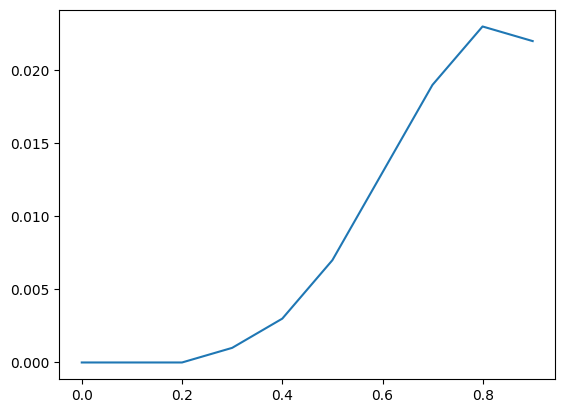

In [6]:
# Test dubins trajectory
x0 = np.array([0, 0, 0])
U = np.array([[1, 0], [1, 0.1], [1, 0.1], [1, 0.2], [1, 0.2], [1, 0], [1, -0.2], [1, -0.5], [1, 0], [1, 0]])
dt = 0.1
traj = dubins_traj(x0, U, dt)
# Plot trajectory
plt.plot(traj[:, 0], traj[:, 1])
plt.show()